In [31]:
#import the libraby
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import PowerTransformer

In [62]:
#import and read the data
df=pd.read_csv('cancer_data.csv',engine='python',encoding='latin1')
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [56]:
#shape of datasert
df.shape

(3047, 33)

In [8]:
#understand the five point summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avgAnnCount,3047.0,606.338544,1416.356223,6.000000,76.000000,171.000000,518.000000,3.815000e+04
avgDeathsPerYear,3047.0,185.965868,504.134286,3.000000,28.000000,61.000000,149.000000,1.401000e+04
TARGET_deathRate,3047.0,178.664063,27.751511,59.700000,161.200000,178.100000,195.200000,3.628000e+02
incidenceRate,3047.0,448.268586,54.560733,201.300000,420.300000,453.549422,480.850000,1.206900e+03
medIncome,3047.0,47063.281917,12040.090836,22640.000000,38882.500000,45207.000000,52492.000000,1.256350e+05
popEst2015,3047.0,102637.370528,329059.220504,827.000000,11684.000000,26643.000000,68671.000000,1.017029e+07
povertyPercent,3047.0,16.878175,6.409087,3.200000,12.150000,15.900000,20.400000,4.740000e+01
studyPerCap,3047.0,155.399415,529.628366,0.000000,0.000000,0.000000,83.650776,9.762309e+03
MedianAge,3047.0,45.272333,45.304480,22.300000,37.700000,41.000000,44.000000,6.240000e+02
MedianAgeMale,3047.0,39.570725,5.226017,22.400000,36.350000,39.600000,42.500000,6.470000e+01


In [9]:
#check for the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  Geography                3047 non-null   object 
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

In [93]:
#check for null values
df.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [64]:
#drop the column due high null value
df.drop('PctSomeCol18_24',axis=1,inplace=True)

In [66]:
df.replace({'?':np.NaN},inplace=True)

In [68]:
df.PctEmployed16_Over.skew(),df.PctEmployed16_Over.kurtosis()

(-0.3876487457653264, 0.197014868892178)

<AxesSubplot:xlabel='PctEmployed16_Over', ylabel='Density'>

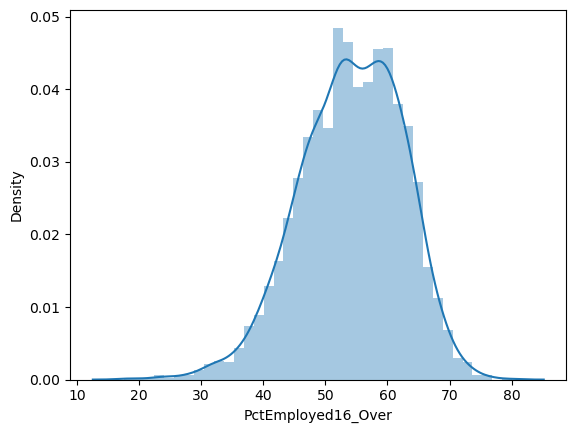

In [73]:
sns.distplot(df.PctEmployed16_Over)

In [92]:
df.PctEmployed16_Over.replace({np.nan:df.PctEmployed16_Over.median()},inplace=True)

<AxesSubplot:xlabel='PctPrivateCoverageAlone', ylabel='Density'>

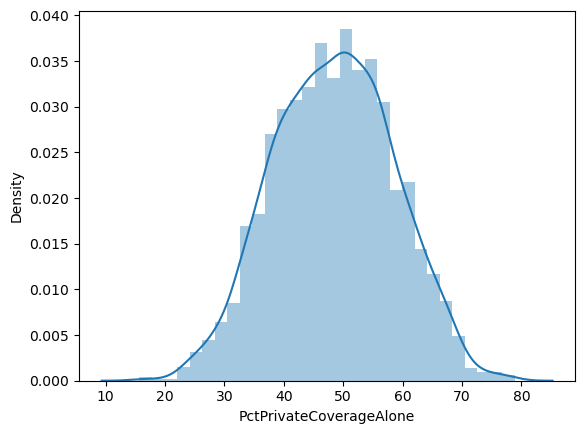

In [76]:
sns.distplot(df.PctPrivateCoverageAlone)    

In [79]:
df.PctPrivateCoverageAlone.replace(np.nan,df.PctPrivateCoverageAlone.median(),inplace=True)

In [80]:
df.shape

(3047, 32)

In [81]:
df.corr()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,...,0.166670,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,...,0.112218,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,...,-0.326195,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,...,0.098707,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,...,0.706971,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,...,0.121343,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,...,-0.682822,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,...,0.068458,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
MedianAge,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,...,-0.021388,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
MedianAgeMale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,...,-0.147777,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


<AxesSubplot:>

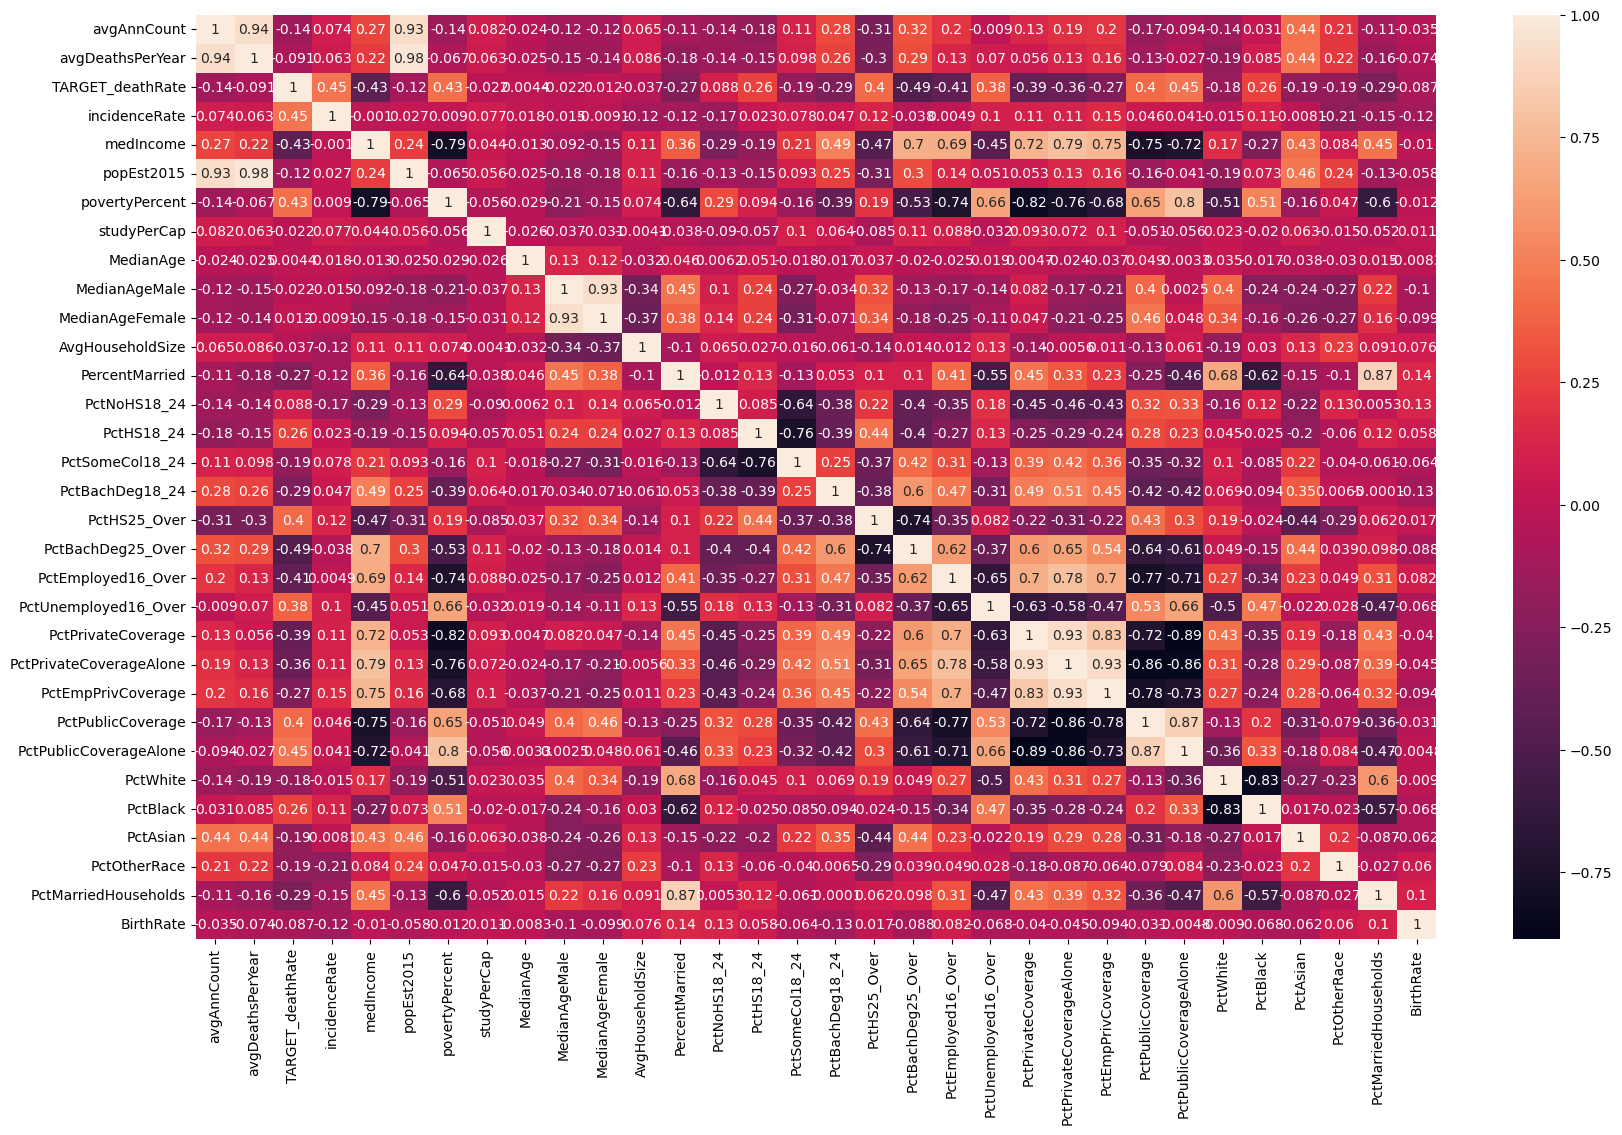

In [13]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

In [14]:
#visually positive and negitive corelated data are available

In [82]:
df_num=df.select_dtypes(include='number')
df_cat=df.select_dtypes(include='object')

In [83]:
for i in df.columns:
    print('no of unique observations in {} are:\n {}'.format(i,len(df[i].value_counts(normalize=True)*100)))
    print('precentage of obseversations are:\n {}'.format(len(df[i].value_counts(normalize=True)*100)/df.shape[0]))
    print('---------------------------')

no of unique observations in avgAnnCount are:
 929
precentage of obseversations are:
 0.3048900557925829
---------------------------
no of unique observations in avgDeathsPerYear are:
 608
precentage of obseversations are:
 0.19954053167049557
---------------------------
no of unique observations in TARGET_deathRate are:
 1053
precentage of obseversations are:
 0.3455858221201181
---------------------------
no of unique observations in incidenceRate are:
 1506
precentage of obseversations are:
 0.4942566458811946
---------------------------
no of unique observations in medIncome are:
 2920
precentage of obseversations are:
 0.9583196586806695
---------------------------
no of unique observations in popEst2015 are:
 2999
precentage of obseversations are:
 0.9842468001312766
---------------------------
no of unique observations in povertyPercent are:
 333
precentage of obseversations are:
 0.10928782408926813
---------------------------
no of unique observations in studyPerCap are:
 1117

In [84]:
#drop the following columns due unique values
df.drop(['Geography'],axis=1,inplace=True)

In [94]:
#Transform the data
pt=PowerTransformer()
df1=pt.fit_transform(df)
df1=pd.DataFrame(df1,columns=df.columns)

In [95]:
#Dimensionally Reduction
from sklearn.decomposition import PCA

In [96]:
pca=PCA()
pca.fit(df1)

PCA()

In [97]:
pca.explained_variance_ratio_

array([2.97250637e-01, 2.00580754e-01, 9.40129601e-02, 6.18187271e-02,
       4.73664188e-02, 3.62637241e-02, 3.24070353e-02, 2.68728053e-02,
       2.37980777e-02, 2.12880360e-02, 1.95566374e-02, 1.85433042e-02,
       1.65970235e-02, 1.41536553e-02, 1.31753627e-02, 1.26101264e-02,
       1.10268771e-02, 9.27683609e-03, 7.53742960e-03, 6.26577512e-03,
       5.77393483e-03, 5.19899495e-03, 4.51646141e-03, 3.76863783e-03,
       3.59311480e-03, 2.67281608e-03, 1.87960171e-03, 1.59358325e-03,
       6.00652448e-04, 5.86223516e-32, 1.10280583e-33])

In [98]:
a=pca.explained_variance_ratio_.cumsum()*100
a

array([ 29.72506369,  49.78313907,  59.18443508,  65.36630779,
        70.10294968,  73.72932208,  76.97002561,  79.65730615,
        82.03711392,  84.16591752,  86.12158127,  87.97591169,
        89.63561404,  91.05097957,  92.36851584,  93.62952848,
        94.73221619,  95.6598998 ,  96.41364276,  97.04022027,
        97.61761375,  98.13751325,  98.58915939,  98.96602317,
        99.32533465,  99.59261626,  99.78057643,  99.93993476,
       100.        , 100.        , 100.        ])

In [191]:
#for now keep the variance explained to 90%
b=a[a<=90]
b

array([29.72506369, 49.78313907, 59.18443508, 65.36630779, 70.10294968,
       73.72932208, 76.97002561, 79.65730615, 82.03711392, 84.16591752,
       86.12158127, 87.97591169, 89.63561404])

In [192]:
#len of the pca components found to be
len(b)

13

Text(0, 0.5, 'Cumilative explained variance')

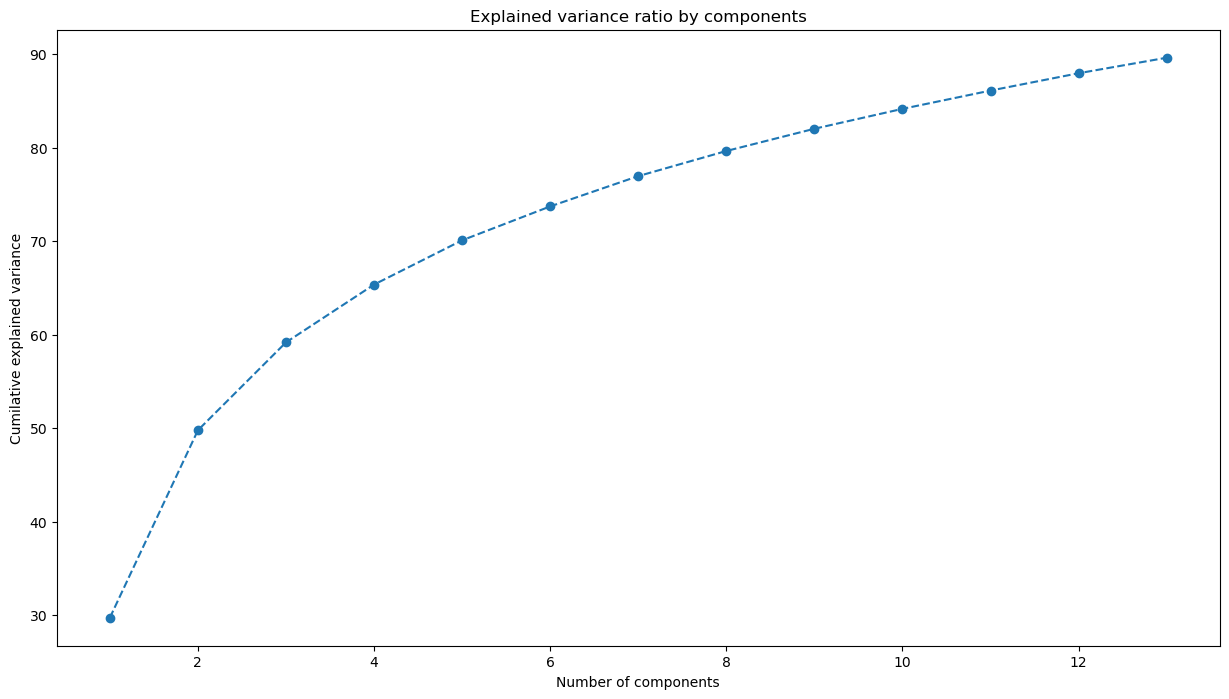

In [193]:
# Pictorial representation of the data which explains 90 percent variation
plt.figure(figsize=(15,8))
plt.plot(range(1,14),b,marker='o',linestyle='--')
plt.title('Explained variance ratio by components')
plt.xlabel('Number of components')
plt.ylabel('Cumilative explained variance')

In [194]:
# We fit the PCA componets back to model and transform the data
pca=PCA(n_components=13,random_state=10)
components=pca.fit_transform(df1)


In [195]:
df_pca=pd.DataFrame(data=components,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,2.512642,1.942595,-1.182225,-0.862308,-1.523091,0.393525,-0.293809,0.788907,0.952834,0.314883,-0.810453,0.201197,0.055164
1,2.479273,2.882878,0.489907,-0.764691,1.955986,1.333340,1.054290,0.681382,0.565402,-0.882530,-0.327111,0.940518,0.154063
2,-0.436376,-0.836254,0.083102,-2.637981,-0.677852,0.194608,1.404375,-0.161136,-0.168471,-0.522884,-0.084740,-0.891517,0.784383
3,-1.857143,0.482554,-1.070123,-0.897332,-1.873553,1.196108,0.887487,0.088835,0.136004,-0.596360,-0.878285,0.175692,-0.108182
4,-0.876257,-3.177492,0.530288,-2.308979,-0.229236,0.618503,0.125534,1.611866,0.094257,0.308074,-0.347786,0.516729,-0.523398


In [183]:
#check for Multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [184]:
vif=pd.DataFrame()
vif['vif_factor']=[variance_inflation_factor(df_pca.values,i) for i in range(df_pca.shape[1])]
vif['features']=df_pca.columns
vif.sort_values('vif_factor',ascending=False)

,vif_factor,features
5,1.0,PC6
13,1.0,PC14
3,1.0,PC4
8,1.0,PC9
16,1.0,PC17
2,1.0,PC3
7,1.0,PC8
9,1.0,PC10
10,1.0,PC11
15,1.0,PC16


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

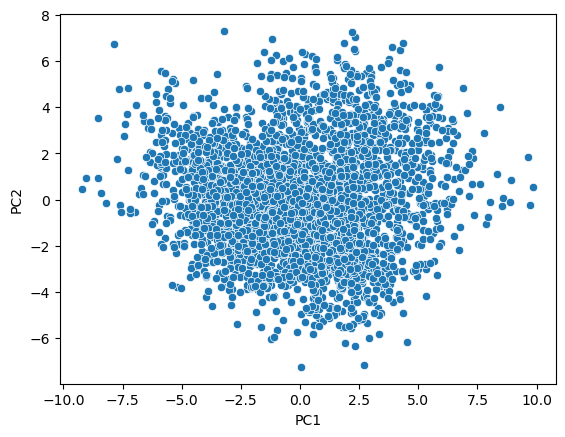

In [185]:
#Scatter plot between the first two PCA components
sns.scatterplot(data=df_pca,x='PC1',y='PC2')


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(1, 0, 'PC1'),
  Text(2, 0, 'PC2'),
  Text(3, 0, 'PC3'),
  Text(4, 0, 'PC4'),
  Text(5, 0, 'PC5'),
  Text(6, 0, 'PC6'),
  Text(7, 0, 'PC7'),
  Text(8, 0, 'PC8'),
  Text(9, 0, 'PC9'),
  Text(10, 0, 'PC10'),
  Text(11, 0, 'PC11'),
  Text(12, 0, 'PC12'),
  Text(13, 0, 'PC13')])

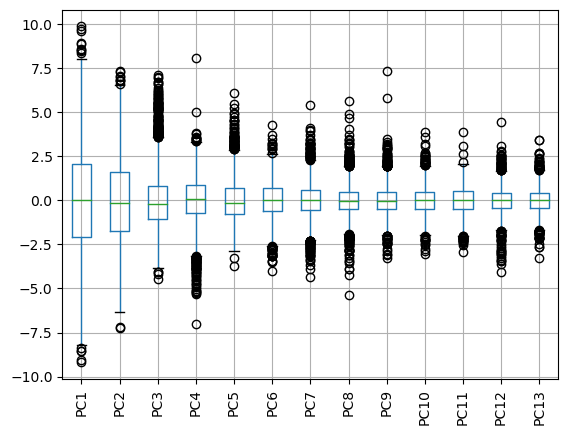

In [197]:
df_pca.boxplot()
plt.xticks(rotation=90)

In [187]:
#presence of outliers confirmed
#lets do the capping
for i in df_pca.columns:
    ll,q1,q3,ul=df_pca[i].quantile([0.01,0.25,0.75,0.95])
    LL=q1-1.5*(q3-q1)
    UL=q3+1.5*(q3-q1)
    df_pca[i]=df_pca[i].map(lambda j: ll if j<LL else ul if j>UL else j)


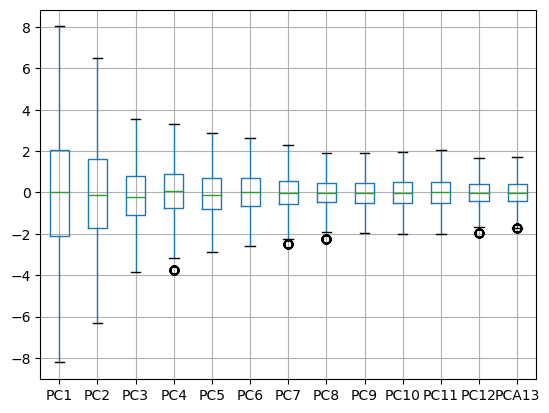

In [109]:
df_pca.boxplot()
plt.show()

In [110]:
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.metrics import silhouette_score

In [188]:
wcss=[]
sscore=[]
for k in range(2,6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit_transform(df_pca)
    wcss.append(kmeans.inertia_)
    score=silhouette_score(df_pca,kmeans.labels_)
    sscore.append(score)

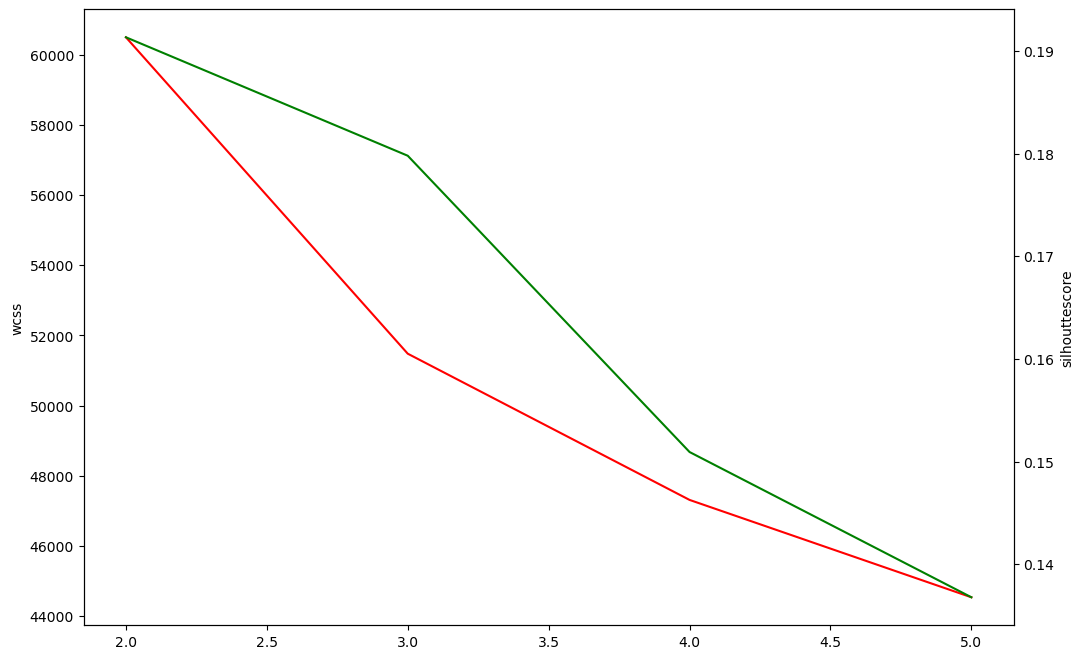

In [189]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(range(2,6),wcss,'r')
ax.set_ylabel('wcss')
ax1=ax.twinx()
ax1.plot(range(2,6),sscore,'g')
ax1.set_ylabel('silhouttescore')
plt.show()

In [190]:
n_clusters=[2,3,4,5,6,7]
for K in n_clusters:
     cluster=KMeans(n_clusters=K, random_state=10)
     predict=cluster.fit_predict(df_pca)
     score=silhouette_score(df_pca,predict,random_state=10)
     print('For {} clusters the silhouette score is {}'.format(K,score))


For 2 clusters the silhouette score is 0.19133186540621344
For 3 clusters the silhouette score is 0.17967487803594126
For 4 clusters the silhouette score is 0.1511756998698403
For 5 clusters the silhouette score is 0.1367725739333405
For 6 clusters the silhouette score is 0.1259540649853598
For 7 clusters the silhouette score is 0.12380955682846473


In [136]:
kmeans=KMeans(n_clusters=2,random_state=10)
kmeans.fit(df_pca)

KMeans(n_clusters=2, random_state=10)

In [137]:
df_pca['clusters']=kmeans.labels_

<AxesSubplot:xlabel='clusters', ylabel='count'>

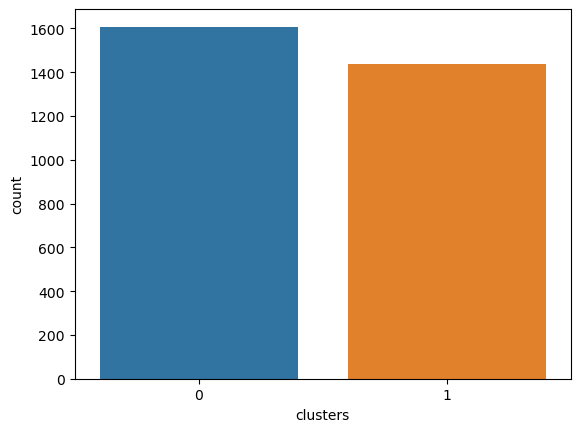

In [138]:
sns.countplot(df_pca['clusters'])

In [139]:
df_pca.clusters.value_counts()


0    1608
1    1439
Name: clusters, dtype: int64

<AxesSubplot:xlabel='PC1', ylabel='PC8'>

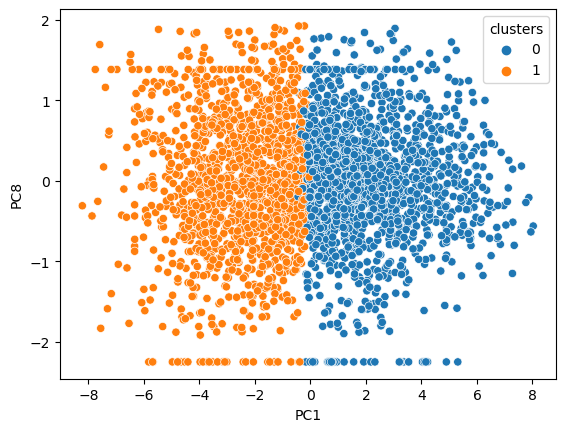

In [140]:
sns.scatterplot(df_pca['PC1'],df_pca['PC8'], df_pca['clusters'])

In [142]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage,dendrogram,cophenet

In [144]:
#Agglomerative Clustering
link_mat=linkage(df_pca.drop('clusters',axis=1),method='ward')
print(link_mat[0:10])

[[1.40800000e+03 2.10500000e+03 6.56564062e-01 2.00000000e+00]
 [1.13400000e+03 1.17000000e+03 7.01407413e-01 2.00000000e+00]
 [5.67000000e+02 1.48200000e+03 7.92052114e-01 2.00000000e+00]
 [2.20500000e+03 2.20700000e+03 8.33687531e-01 2.00000000e+00]
 [1.73200000e+03 1.73800000e+03 8.80539639e-01 2.00000000e+00]
 [2.47000000e+03 2.49200000e+03 9.50292012e-01 2.00000000e+00]
 [3.24000000e+02 1.34800000e+03 9.53988181e-01 2.00000000e+00]
 [8.72000000e+02 9.73000000e+02 9.88713606e-01 2.00000000e+00]
 [1.13900000e+03 2.20800000e+03 1.03748971e+00 2.00000000e+00]
 [8.55000000e+02 1.11400000e+03 1.05080332e+00 2.00000000e+00]]


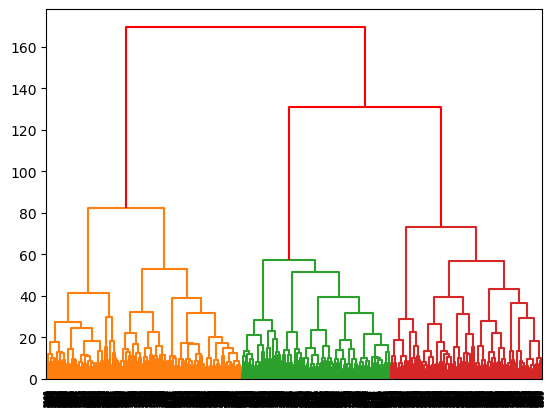

In [145]:
from scipy.cluster import hierarchy
plt.figure()
dn=hierarchy.dendrogram(link_mat,above_threshold_color='red')


In [146]:
aggs=AgglomerativeClustering(n_clusters=3)
aggs.fit(df_pca)

AgglomerativeClustering(n_clusters=3)

In [147]:
df_pca['Agglo_Cluster']=aggs.labels_

<AxesSubplot:xlabel='Agglo_Cluster', ylabel='count'>

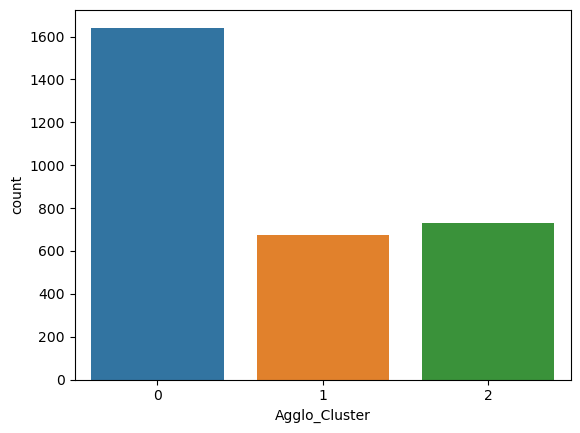

In [148]:
sns.countplot(df_pca['Agglo_Cluster'])

<AxesSubplot:xlabel='PC1', ylabel='PC8'>

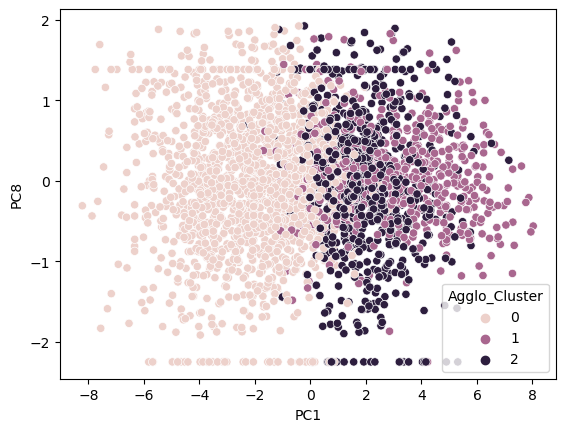

In [150]:
sns.scatterplot(df_pca['PC1'],df_pca['PC8'], df_pca['Agglo_Cluster'])

In [ ]:
since data are overlapping we shall consider clusters=2
this was same case of kmeans, inthere also we was over lapping of data points so we tool two cluster

In [151]:
aggs=AgglomerativeClustering(n_clusters=2)
aggs.fit(df_pca)

df_pca['Agglo_Cluster']=aggs.labels_

<AxesSubplot:xlabel='Agglo_Cluster', ylabel='count'>

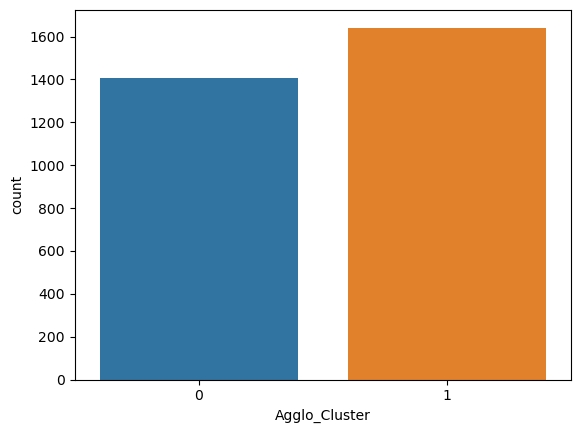

In [152]:
sns.countplot(df_pca['Agglo_Cluster'])

<AxesSubplot:xlabel='PC1', ylabel='PC8'>

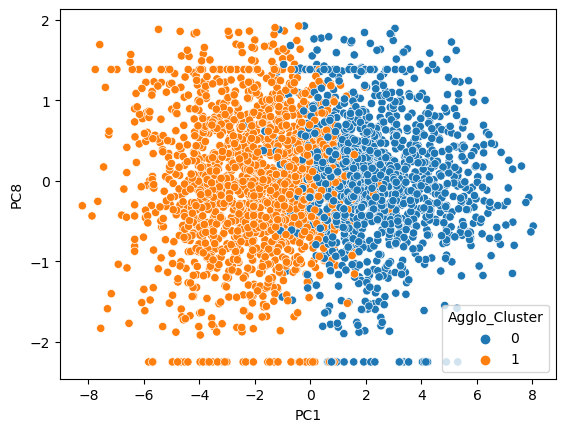

In [153]:
sns.scatterplot(df_pca['PC1'],df_pca['PC8'], df_pca['Agglo_Cluster'])

In [ ]:
#both algo gave two cluster
#kmeans is better

In [154]:
df_kmeans_cluster=pd.concat([df,df_pca['clusters']],axis=1)
df_kmeans_cluster.head()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,clusters
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831,0
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096,0
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488,1
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841,1
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657,1


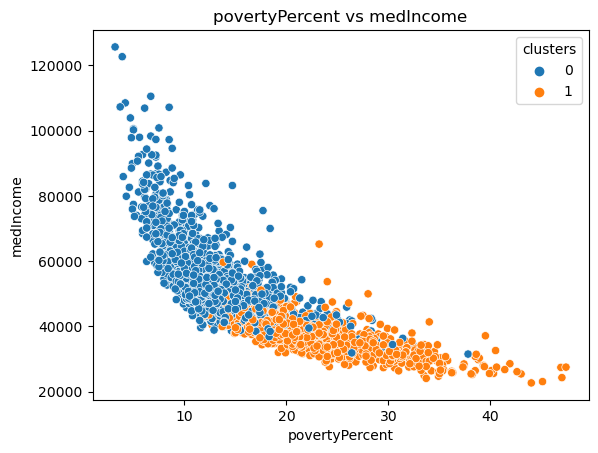

In [161]:
#plt.figure(figsize=(10,8))
sns.scatterplot(df['povertyPercent'],df['medIncome'],hue=df_kmeans_cluster['clusters'])
plt.title('povertyPercent vs medIncome')
plt.show()


In [163]:
# For Cluster 1
df_kmeans_cluster[df_kmeans_cluster.clusters==0].describe()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,clusters
count,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1.608000e+03,1608.000000,1608.000000,1608.000000,1608.000000,...,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.000000,1608.0
mean,936.586560,272.733209,167.664490,449.230157,54386.883085,1.596040e+05,12.973881,212.866234,43.527114,38.771269,...,47.191107,30.971828,15.145709,87.287855,5.462120,1.877661,2.005162,52.965130,5.695316,0.0
std,1822.718685,658.534825,22.110164,48.308861,11448.534571,4.357819e+05,4.057683,574.304340,40.088741,5.158463,...,7.524552,5.652238,3.834714,11.973544,8.717430,3.391649,3.289573,6.570634,1.919725,0.0
min,8.000000,3.000000,59.700000,201.300000,31487.000000,1.330000e+03,3.200000,0.000000,22.300000,22.400000,...,16.300000,11.200000,2.600000,20.392332,0.000000,0.000000,0.000000,23.885628,0.000000,0.0
25%,106.000000,29.000000,154.375000,425.400000,46961.000000,1.389125e+04,10.400000,0.000000,36.600000,35.600000,...,42.400000,27.475000,12.500000,82.701172,0.551633,0.391086,0.374432,49.255032,4.636231,0.0
50%,323.500000,85.500000,168.700000,453.549422,51836.500000,4.182050e+04,12.400000,9.099766,40.100000,38.800000,...,47.000000,31.300000,15.200000,91.753864,1.531748,0.854979,0.924172,53.396186,5.368548,0.0
75%,1237.750000,239.000000,182.200000,478.100000,58608.500000,1.379478e+05,15.000000,191.649529,43.500000,42.100000,...,52.100000,35.000000,17.725000,95.746059,6.198079,2.075037,2.326271,57.057985,6.414992,0.0
max,38150.000000,14010.000000,292.500000,1014.200000,125635.000000,1.017029e+07,37.800000,9439.200444,535.200000,60.200000,...,70.700000,46.400000,31.800000,99.646286,63.447228,42.619425,41.930251,78.075397,21.326165,0.0


In [164]:
# For Cluster 2
df_kmeans_cluster[df_kmeans_cluster.clusters==1].describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,clusters
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1.439000e+03,1439.000000,1439.000000,1439.000000,1439.000000,...,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.0
mean,237.305319,89.008339,190.955455,447.194085,38879.577484,3.898038e+04,21.241001,91.183540,47.222516,40.464072,...,34.497498,42.153648,23.815288,79.574924,13.182014,0.557020,1.959342,49.320465,5.578835,1.0
std,527.535795,189.441012,28.258620,60.790337,5796.288839,9.722357e+04,5.702275,466.654471,50.442485,5.157605,...,6.380075,5.340707,4.798990,19.408721,18.195663,0.810140,3.757298,6.020705,2.056088,0.0
min,6.000000,3.000000,66.300000,211.100000,22640.000000,8.270000e+02,10.900000,0.000000,23.900000,22.800000,...,13.500000,27.400000,11.900000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000,1.0
25%,62.500000,28.000000,173.600000,412.700000,34919.500000,1.092150e+04,17.250000,0.000000,39.100000,37.400000,...,30.150000,38.400000,20.500000,68.427433,0.774993,0.155003,0.221258,46.619068,4.344735,1.0
50%,116.000000,51.000000,191.400000,453.549422,38655.000000,1.999000e+04,20.100000,0.000000,41.600000,40.200000,...,34.800000,41.800000,23.200000,87.079280,3.498480,0.386923,0.709000,50.289481,5.396074,1.0
75%,219.000000,92.000000,209.100000,483.900000,42575.500000,3.769850e+04,24.100000,0.000000,44.650000,43.100000,...,39.000000,45.300000,26.300000,94.898610,21.222944,0.662325,1.991256,53.211070,6.597318,1.0
max,10411.000000,3927.000000,362.800000,1206.900000,65192.000000,1.759335e+06,47.400000,9762.308998,624.000000,64.700000,...,51.800000,65.100000,46.600000,100.000000,85.947799,14.744821,37.859023,64.901478,18.556701,1.0


In [165]:
x=df_pca.drop(['clusters','Agglo_Cluster'],axis=1)
y=df_pca.clusters
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)


In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_auc_score
rfc=RandomForestClassifier()

In [172]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [168]:
print('Accuracy of train',accuracy_score(y_train,dt.predict(x_train)))
print('Accuracy of test',accuracy_score(y_test,dt.predict(x_test)))


Accuracy of train 1.0
Accuracy of test 0.994535519125683


In [169]:
print(classification_report(y_train,dt.predict(x_train)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1115
           1       1.00      1.00      1.00      1017

    accuracy                           1.00      2132
   macro avg       1.00      1.00      1.00      2132
weighted avg       1.00      1.00      1.00      2132



In [170]:
print('ROC score',roc_auc_score(y_train,dt.predict(x_train)))


ROC score 1.0


In [174]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [175]:
rfc.feature_importances_

array([0.82730273, 0.02594904, 0.01322419, 0.01066739, 0.02026446,
       0.02215348, 0.01289539, 0.01091406, 0.01093281, 0.01081972,
       0.01015502, 0.01080163, 0.01392008])

In [176]:
# hence classification is good